In [3]:
#importing packages
from pathlib import Path 
import os
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
#reading the files
df_title = pd.read_csv("title.basics-moviereduced.tsv.gz",
                         sep="\t")

df_titleprin = pd.read_csv("title.principals-moviereduced.tsv.gz",
                         sep="\t")

df_name = pd.read_csv("name.basics-moviereduced.tsv.gz",
                         sep="\t")

#commented out file due to low storage
#df_akas = pd.read_csv("title.akas-moviereduced.tsv.gz", sep = "\t")

df_ratings = pd.read_csv("title.ratings-moviereduced.tsv.gz", sep = "\t")

In [5]:
#merging dfs to get title and ratings in one
df_movie_info = df_title.merge(df_ratings, left_on="tconst", right_on="tconst", how='outer')

#chainging types
df_movie_info = df_movie_info.replace(to_replace="\\N")
df_movie_info["startYear"] = pd.to_numeric(df_movie_info["startYear"])
df_movie_info["runtimeMinutes"] = pd.to_numeric(df_movie_info["runtimeMinutes"])

# add movie length to titleprin dataframe
df_titleprin = df_titleprin.merge(df_movie_info[["tconst","runtimeMinutes"]], on="tconst")

#df with writers
df_writers_by_title = df_titleprin[df_titleprin["category"] == "writer"]

df_writers_by_title

,tconst,ordering,nconst,category,job,characters,runtimeMinutes
3,tt0000502,4,nm0657268,writer,\N,\N,100
4,tt0000502,5,nm0675388,writer,\N,\N,100
25,tt0000615,6,nm0092809,writer,novel,\N,90
31,tt0000630,3,nm0000636,writer,"play ""Hamlet""",\N,90
34,tt0000675,2,nm0148859,writer,novel,\N,90
...,...,...,...,...,...,...,...
4114517,tt9916538,7,nm4900525,writer,script writer,\N,123
4114518,tt9916538,8,nm2679404,writer,story,\N,123
4114520,tt9916620,1,nm7311709,writer,Writer,\N,123
4114537,tt9916680,6,nm10538576,writer,\N,\N,100


In [7]:
#count of movies written by each person
writer_movie_count_df = df_writers_by_title.groupby(["nconst"])["tconst"].count()

#average length of movies written by each person
writer_avg_length_df = df_writers_by_title.groupby(["nconst"])["runtimeMinutes"].mean()

#merge count & avg length with names df
df_writers_name = df_name.merge(writer_movie_count_df, on="nconst", how="inner")
df_writers_name = df_writers_name.merge(writer_avg_length_df, on="nconst", how="inner")

#rename columns
df_writers_name.rename(columns = {'tconst':'writtenMovieCount', 'runtimeMinutes':'avgRuntimeMinutes'}, inplace = True)

In [8]:
#limit to people who have written at least 10 movies and still alive
written_min5_movies = df_writers_name[df_writers_name['writtenMovieCount'] >=5]
display(written_min5_movies)

df_writer_set = written_min5_movies[written_min5_movies['deathYear'] == "\\N"]

#sort writers by runtime
#df_writer_set = df_writer_set.sort_values(by='runtimeMinutes_x', ascending=False).head()
display(df_writer_set)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,writtenMovieCount,avgRuntimeMinutes
0,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0060827,tt0050986,tt0083922",13,111.538462
1,nm0000019,Federico Fellini,1920,1993,"writer,director,assistant_director","tt0071129,tt0056801,tt0050783,tt0047528",25,96.160000
2,nm0000033,Alfred Hitchcock,1899,1980,"director,producer,actor","tt0040746,tt0054215,tt0052357,tt0053125",6,94.666667
3,nm0000036,Buster Keaton,1895,1966,"actor,writer,director","tt0019421,tt0016332,tt0017925,tt0015324",9,85.111111
5,nm0000041,Akira Kurosawa,1910,1998,"writer,director,assistant_director","tt0089881,tt0051808,tt0047478,tt0080979",41,100.487805
...,...,...,...,...,...,...,...,...
177313,nm9957198,Davey Robins,\N,\N,"writer,executive","tt15107912,tt12752002,tt14364356",5,78.400000
177321,nm9957809,Kathryn L Scurry,\N,\N,"writer,producer,director","tt8671282,tt9266164,tt13366134,tt9838876",10,89.400000
177339,nm9959549,Syed,\N,\N,writer,"tt13131798,tt10286746,tt10207954,tt8665746",7,138.142857
177415,nm9969720,Yashomati Devi,\N,\N,writer,"tt12278882,tt9660726,tt7598982,tt15134194",5,101.200000


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,writtenMovieCount,avgRuntimeMinutes
14,nm0000092,John Cleese,1939,\N,"actor,writer,producer","tt0085959,tt0095159,tt0063929,tt0071853",7,86.000000
19,nm0000108,Luc Besson,1959,\N,"writer,producer,director","tt0100263,tt0110413,tt2872732,tt0119116",41,95.560976
20,nm0000116,James Cameron,1954,\N,"writer,producer,director","tt0120338,tt0090605,tt0103064,tt0499549",6,116.500000
21,nm0000118,John Carpenter,1948,\N,"soundtrack,writer,composer","tt0082340,tt0077651,tt0080749,tt0096256",21,93.523810
29,nm0000175,Stephen King,1947,\N,"writer,producer,actor","tt0111161,tt0324864,tt0091499,tt0083767",91,94.769231
...,...,...,...,...,...,...,...,...
177313,nm9957198,Davey Robins,\N,\N,"writer,executive","tt15107912,tt12752002,tt14364356",5,78.400000
177321,nm9957809,Kathryn L Scurry,\N,\N,"writer,producer,director","tt8671282,tt9266164,tt13366134,tt9838876",10,89.400000
177339,nm9959549,Syed,\N,\N,writer,"tt13131798,tt10286746,tt10207954,tt8665746",7,138.142857
177415,nm9969720,Yashomati Devi,\N,\N,writer,"tt12278882,tt9660726,tt7598982,tt15134194",5,101.200000


In [11]:
#get top 10 movies with the longest runtime with the name of writer

df_writer_set_by_title = df_writer_set.merge(df_writer_set[['nconst', 'primaryName']], on='nconst', how="outer")

df_writers_set_by_title = df_titleprin[df_titleprin["job"] == "screenplay"]


df_writer_set_by_title = df_writer_set_by_title.sort_values(by='avgRuntimeMinutes', ascending=False)

display(df_writer_set_by_title)

,nconst,primaryName_x,birthYear,deathYear,primaryProfession,knownForTitles,writtenMovieCount,avgRuntimeMinutes,primaryName_y
5136,nm1104073,Jong-ho Lee,\N,\N,writer,"tt0303815,tt0350715,tt0367867,tt0369369",10,278.000000,Jong-ho Lee
8463,nm4060618,Fernando Sanquita,\N,\N,"writer,director,production_manager","tt0757327,tt2248695,tt1032198,tt0495734",5,265.800000,Fernando Sanquita
7618,nm2762840,Engyoku Godôken,\N,\N,writer,"tt5048904,tt5048914,tt1094645,tt1094644",5,244.200000,Engyoku Godôken
699,nm0131947,Alessandro Camon,\N,\N,"producer,writer","tt1027718,tt0144084,tt0790712,tt1308729",9,237.111111,Alessandro Camon
4012,nm0822500,Jack Stanley,\N,\N,writer,"tt0034577,tt0033761,tt0025562,tt0036647",5,235.600000,Jack Stanley
...,...,...,...,...,...,...,...,...,...
5099,nm10971477,Mariya Mazurova,\N,\N,"writer,director","tt12216182,tt10930926,tt12314598,tt12307790",5,48.400000,Mariya Mazurova
3690,nm0751640,Janet Russo,\N,\N,"producer,writer,costume_department","tt12406310,tt12406620,tt12407656,tt12407846",5,48.200000,Janet Russo
8860,nm5022138,Kira Ivanoff,\N,\N,"producer,writer,assistant_director","tt3086862,tt8885914,tt8924830,tt8924838",6,48.000000,Kira Ivanoff
5818,nm1337908,Steven Zorn,\N,\N,"writer,script_department,producer","tt13516500,tt4156480,tt2740382,tt2702548",7,47.428571,Steven Zorn


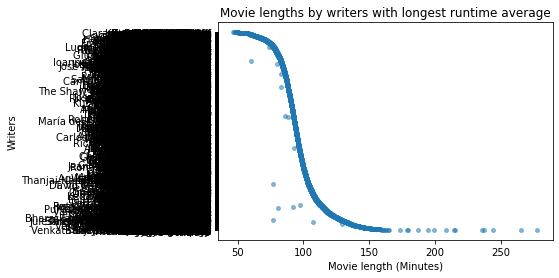

In [58]:
# limit director set to top 20 directors by average runtime
df_writer_set_small = df_writer_set_by_title.sort_values(by='runtimeMinutes_x', ascending=False).head(20)

small_df_writer_set_by_title = df_writers_by_title.merge(df_writer_set_small[['nconst', 'primaryName_x']], 
                                                       on='nconst', how="inner").sort_values(by='runtimeMinutes_x', 
                                                                                             ascending=False)

# scatterplot that shows the distribution of movie lengths per writer
plt.scatter(df_writer_set_by_title['runtimeMinutes_x'], df_writer_set_by_title['primaryName_y'], s = 15, alpha=0.5)
plt.title("Movie lengths by writers with longest runtime average")
plt.ylabel("Writers")
plt.xlabel("Movie length (Minutes)")
plt.show()

# The choice for writers here are Jong-Ho Lee, Fernando Sanquita (Walter Schlee is reported dead on Google so data here is misleading)